# Optimization

Previously, we computed the distance between points on a bee trajectory and a flower.

Let's revisit that idea.

We will explain the following code in lecture, but except the `make_bee_track` function, there is nothing new here:

array([42.28498551, 39.31902403, 36.38606549, 33.49478067, 30.65696271,
       27.88893783, 25.21370269, 22.66413937, 20.28768304, 18.15244922,
       16.35320159, 15.01124417, 14.25630249, 14.18243032, 14.79982968,
       16.02881927, 17.74276178, 19.81622073, 22.1484553 , 24.66617117])

Text(0, 0.5, 'distance')

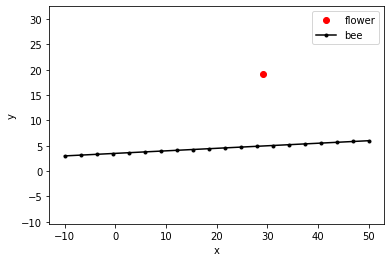

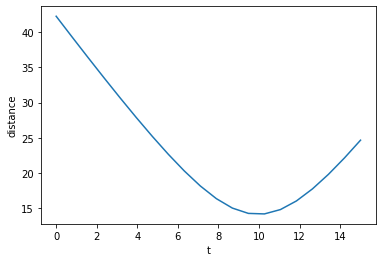

In [1]:
import numpy as np
import matplotlib.pyplot as plt

flower = np.array([29.1, 19.1])
def make_bee_track(t):
    # Here we are using plain Python to
    # do this math. We could also use numpy.
    pos0 = (-10,3)
    velocity = (4.0, 0.2)
    pos_x = pos0[0] + t*velocity[0]
    pos_y = pos0[1] + t*velocity[1]
    return np.array([pos_x,pos_y])

t = np.linspace(0,15,20)
bee_track = make_bee_track(t)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot( [flower[0]], [flower[1]], 'or', label='flower' )
ax.plot( bee_track[0], bee_track[1], '.-k', label='bee')
ax.axis('equal')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')

def my_distance(a,b):
    a = np.array(a)
    b = np.array(b)
    return np.sqrt(np.sum((a-b)**2))

distance = np.zeros(bee_track.shape[1])
for i in range(bee_track.shape[1]):
    bee_pos = bee_track[:,i]
    distance[i] = my_distance(bee_pos, flower )
display(distance)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot( t, distance )
ax.set_xlabel('t')
ax.set_ylabel('distance')

Note that in the above, we *parameterized* the bee trajectory by the variable `t` in the function `make_bee_track()`. This means we could get a new point on the track by choosing a new value of `t`. For example:

In [2]:
print(make_bee_track(0.0))
print(make_bee_track(0.1))
print(make_bee_track(0.2))
print(make_bee_track(1.0))

[-10.   3.]
[-9.6   3.02]
[-9.2   3.04]
[-6.   3.2]


Given the plot of distance versus t above, we can see the distance is minimized when t is near 10. What is the bee's position when t is 10?

In [3]:
print(make_bee_track(10))

[30.  5.]


We can check back to the xy plot to see, indeed, this point is pretty close to the flower.

What if we want to know, however, exactly the closest point? There are several ways to find this. Here we are going to use a "brute force" approach which will work on many different problems. Specifically, we will use [scipy.optimize.minimize_scalar](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html). The overall idea of this kind of *numerical optimization* is that we find the best fitting parameter to minimize our "error".

In this example, we are not so much concerned with the exact algorithm being used, but with the way we call this algorithm.

We will make a class to do this:

In [4]:
class DistanceFinder:
    def __init__(self, flower):
        self.flower = flower
    def calc_distance(self, t):
        x1, y1 = self.flower
        x2, y2 = make_bee_track(t)
        dist = my_distance((x1,y1), (x2,y2))
        print(f't: {t} -> dist: {dist}')
        return dist
    
distance_finder = DistanceFinder(flower)

import scipy.optimize
result = scipy.optimize.minimize_scalar(distance_finder.calc_distance)

t: 0.0 -> dist: 42.284985514955544
t: 1.0 -> dist: 38.533362168385985
t: 2.6180339999999998 -> dist: 32.59108194465938
t: 62.59129724429421 -> dist: 211.29554879111376
t: 2.6180339999999998 -> dist: 32.59108194465938
t: 25.525781468370084 -> dist: 63.95530046803113
t: 11.368014669503447 -> dist: 15.224072635976565
t: 11.182165378674357 -> dist: 14.962630728271483
t: 9.498980311019054 -> dist: 14.243060828848716
t: 6.870692772384349 -> dist: 18.756625572603213
t: 9.932591048754206 -> dist: 14.127552061912702
t: 9.955643819606893 -> dist: 14.127362195018625
t: 9.951402223116967 -> dist: 14.127351833960489
t: 9.95137155931316 -> dist: 14.127351833427115
t: 9.951371706603458 -> dist: 14.127351833427124
t: 9.95137141202286 -> dist: 14.127351833427127


In [5]:
scipy.optimize.minimize_scalar?

In [6]:
result

     fun: 14.127351833427115
    nfev: 16
     nit: 11
 success: True
       x: 9.95137155931316

In [7]:
type(result)

scipy.optimize.optimize.OptimizeResult

In [8]:
result.x

9.95137155931316

In [9]:
print(distance_finder.calc_distance(9.95137155931316))
print(distance_finder.calc_distance(9.950))
print(distance_finder.calc_distance(9.960))

t: 9.95137155931316 -> dist: 14.127351833427115
14.127351833427115
t: 9.95 -> dist: 14.127352901375403
14.127352901375403
t: 9.96 -> dist: 14.127394097992738
14.127394097992738


In [10]:
# Where is the bee for this value of `t`?
make_bee_track(9.95137155931316)

array([29.80548624,  4.99027431])